## Step 1:

Import Basic Scikit Learn Libraries for Data Manipulation as well Data Visulization.

In [24]:

# Import Data Manipulation Libraries
import numpy as np
import pandas as pd

# Import Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Import Filter Warning Libraries
import warnings
warnings.filterwarnings('ignore')

# Import Logging  Files
import logging

logging.basicConfig(
    level=logging.INFO,
    filemode='w',
    filename='model.log',
    format='%(asctime)s - %(levelname)s - %(message)s')



In [25]:
# Load Dataset
url = 'https://raw.githubusercontent.com/MontyVasita18/CementCompositeStrength_PredictionModel/refs/heads/main/concrete_data.csv'

df=pd.read_csv(url)

df.sample(frac=1)

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
922,255.0,99.0,77.0,189.0,6.0,919.0,749.0,28,33.80
351,213.5,0.0,174.2,154.6,11.7,1052.3,775.5,28,45.94
169,425.0,106.3,0.0,153.5,16.5,852.1,887.1,91,65.20
786,331.0,0.0,0.0,192.0,0.0,978.0,825.0,28,31.45
446,165.0,128.5,132.1,175.1,8.1,1005.8,746.6,56,53.72
...,...,...,...,...,...,...,...,...,...
69,485.0,0.0,0.0,146.0,0.0,1120.0,800.0,28,71.99
713,157.0,236.0,0.0,192.0,0.0,935.4,781.2,3,9.69
160,362.6,189.0,0.0,164.9,11.6,944.7,755.8,56,77.30
828,522.0,0.0,0.0,146.0,0.0,896.0,896.0,28,74.99



## Step 3:

Doing Exploratory Data Analysis [EDA]:--->

1. Univariate Analysis

2. Bi Variate Analysis

In [26]:
# Performing Univariate Analysis
from collections import OrderedDict

stats=[]

for i in df.columns:
    numerical_stats= OrderedDict({
        'feature':i,
        'type':df[i].dtype,
        'null_values':df[i].isnull().sum(),
        'unique_values':df[i].nunique(),
        'mode':df[i].mode()[0],
        'mean':df[i].mean(),
        'std_deviation':df[i].std(),
        'min_value':df[i].min(),
        'max_value':df[i].max(),
        'range':df[i].max() - df[i].min(),
        'skewness':df[i].skew(),
        'kurtosis':df[i].kurtosis(),
        'IQR':df[i].quantile(0.75) - df[i].quantile(0.25),
    })
    stats.append(numerical_stats)

df_stats=pd.DataFrame(stats)


df_stats

,feature,type,null_values,unique_values,mode,mean,std_deviation,min_value,max_value,range,skewness,kurtosis,IQR
0,cement,float64,0,278,362.6,281.167864,104.506364,102.00,540.0,438.00,0.509481,-0.520652,157.625
1,blast_furnace_slag,float64,0,185,0.0,73.895825,86.279342,0.00,359.4,359.40,0.800717,-0.508175,142.950
2,fly_ash,float64,0,156,0.0,54.188350,63.997004,0.00,200.1,200.10,0.537354,-1.328746,118.300
3,water,float64,0,195,192.0,181.567282,21.354219,121.80,247.0,125.20,0.074628,0.122082,27.100
4,superplasticizer,float64,0,111,0.0,6.204660,5.973841,0.00,32.2,32.20,0.907203,1.411269,10.200
5,coarse_aggregate,float64,0,284,932.0,972.918932,77.753954,801.00,1145.0,344.00,-0.040220,-0.599016,97.400
6,fine_aggregate,float64,0,302,594.0,773.580485,80.175980,594.00,992.6,398.60,-0.253010,-0.102177,93.050
7,age,int64,0,14,28.0,45.662136,63.169912,1.00,365.0,364.00,3.269177,12.168989,49.000
8,concrete_compressive_strength,float64,0,845,33.4,35.817961,16.705742,2.33,82.6,80.27,0.416977,-0.313725,22.425


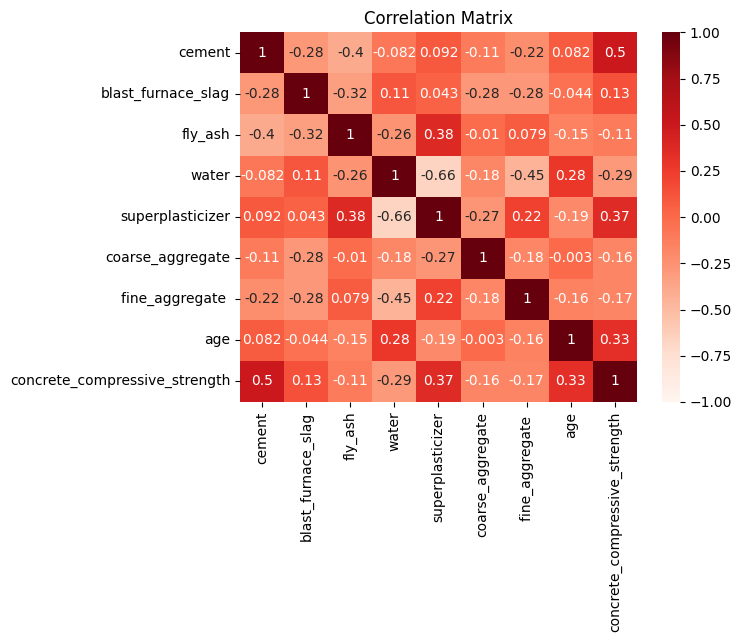

In [27]:
# Checking Correlation Matrix
# X = Independent Variables
# y = Dependent Variable ------->['Concrete_compressive_strength']
sns.heatmap(df.corr(),annot=True,yticklabels=True,vmax=1,center=0,vmin=-1, cmap='Reds')
plt.title('Correlation Matrix')
plt.show()


In [28]:
# Understanding Feature and Create New Features Based on Correlation
df.corr()['concrete_compressive_strength']

cement                           0.497832
blast_furnace_slag               0.134829
fly_ash                         -0.105755
water                           -0.289633
superplasticizer                 0.366079
coarse_aggregate                -0.164935
fine_aggregate                  -0.167241
age                              0.328873
concrete_compressive_strength    1.000000
Name: concrete_compressive_strength, dtype: float64

In [29]:
df['Composite_Ratio'] = 1/(df['cement'] + df['superplasticizer'] + df['blast_furnace_slag'])/(df['water'])

In [30]:
df.corr()['concrete_compressive_strength']

cement                           0.497832
blast_furnace_slag               0.134829
fly_ash                         -0.105755
water                           -0.289633
superplasticizer                 0.366079
coarse_aggregate                -0.164935
fine_aggregate                  -0.167241
age                              0.328873
concrete_compressive_strength    1.000000
Composite_Ratio                 -0.373830
Name: concrete_compressive_strength, dtype: float64

In [31]:
df['cement_to_water_ratio'] = 1/(df['cement']/df['water'])

In [32]:
df.corr()['concrete_compressive_strength']

cement                           0.497832
blast_furnace_slag               0.134829
fly_ash                         -0.105755
water                           -0.289633
superplasticizer                 0.366079
coarse_aggregate                -0.164935
fine_aggregate                  -0.167241
age                              0.328873
concrete_compressive_strength    1.000000
Composite_Ratio                 -0.373830
cement_to_water_ratio           -0.500692
Name: concrete_compressive_strength, dtype: float64

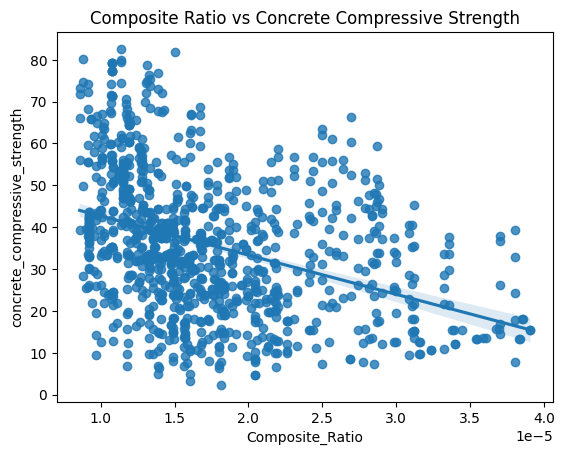

In [33]:
sns.regplot(x=df['Composite_Ratio'], y=df['concrete_compressive_strength'])
plt.title('Composite Ratio vs Concrete Compressive Strength')

plt.show()

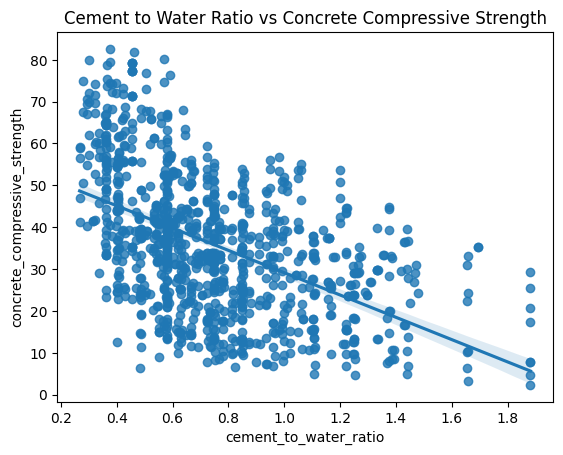

In [34]:
sns.regplot(x=df['cement_to_water_ratio'],y=df['concrete_compressive_strength'])
plt.title('Cement to Water Ratio vs Concrete Compressive Strength')
plt.show()

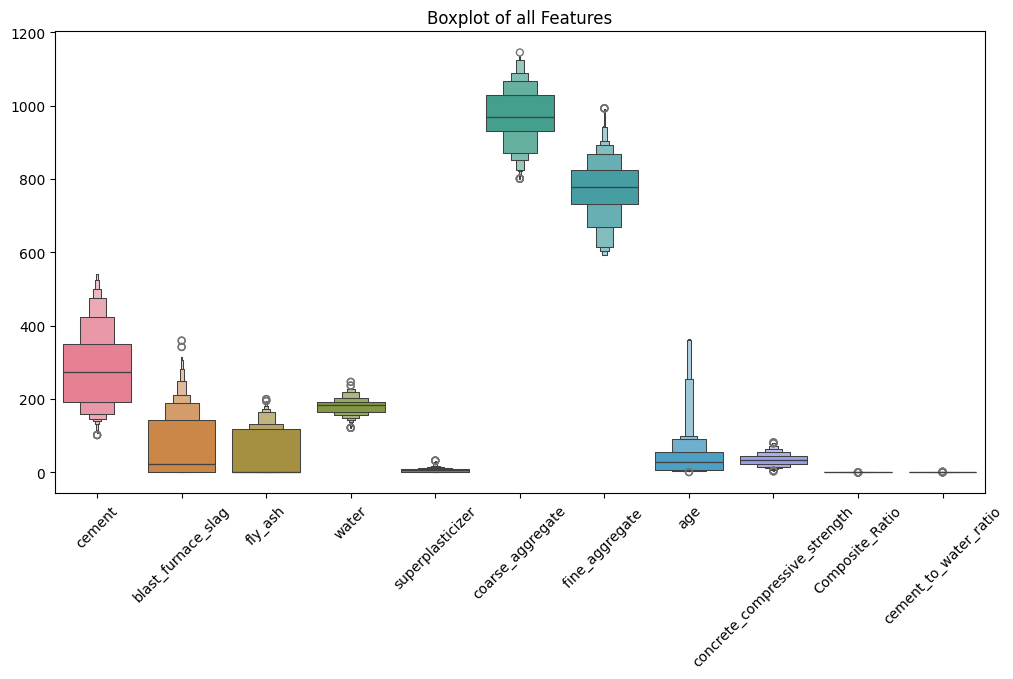

In [63]:
plt.figure(figsize=(12,6))
sns.boxenplot(data=df)

plt.xticks(rotation=45)
plt.title('Boxplot of all Features')

plt.show()

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


X=df.drop(columns=['concrete_compressive_strength'])
X=X.assign(constant=1)

vif_data=pd.DataFrame()
vif_data["Feature"]=X.columns
vif_data["VIF"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_data=vif_data[vif_data["Feature"]!='constant']

print(vif_data)

                 Feature        VIF
0                 cement  16.845428
1     blast_furnace_slag  11.328921
2                fly_ash   6.232357
3                  water   9.040867
4       superplasticizer   2.968025
5       coarse_aggregate   5.098293
6        fine_aggregate    7.034744
7                    age   1.135259
8        Composite_Ratio   9.827568
9  cement_to_water_ratio   6.959252


## Data Insights:

1. Higher Vale of VIF indicates high multicollinearity.[VIF > 10]---->Column Shows Multicollinearity.  

2. Such Column must be Removed Before applying any Regression Model.

## Step 5:

1. Split Data into Independent and Dependent Column i.e X and y

2. Using Train and Test Split to Prevent Data leakage

In [36]:
from sklearn.model_selection import train_test_split

X=df.drop(columns='concrete_compressive_strength')

y=df['concrete_compressive_strength']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [37]:
# Using Scaling Technique

from sklearn.preprocessing import MinMaxScaler

scalar=MinMaxScaler()
X_train=scalar.fit_transform(X_train)

X_test=scalar.transform(X_test)



In [38]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression()

LR.fit(X_train,y_train)

y_pred_LR=LR.predict(X_test)


from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

r2_score_LR=r2_score(y_test,y_pred_LR)
r2_score_LR

0.6058950475913114

In [41]:
# Decision Tree Regressor

from sklearn.tree import DecisionTreeRegressor

DT=DecisionTreeRegressor()

DT.fit(X_train,y_train)

y_pred_DT=DT.predict(X_test)


r2_score_DR=r2_score(y_test,y_pred_DT)

r2_score_DR={f""}



0.8471758789313937

In [43]:
mse_LR=mean_squared_error(y_test,y_pred_LR)
mse_DT=mean_squared_error(y_test,y_pred_DT)

mae_LR=mean_absolute_error(y_test,y_pred_LR)
mae_DT=mean_absolute_error(y_test,y_pred_DT)

print(f'Linear Regression R2 Score: {r2_score_LR}')

print(f'Decision Tree Regression R2 Score: {r2_score_DR}')

print(f'Linear Regression MSE: {mse_LR}')

print(f'Decision Tree Regression MSE: {mse_DT}')

print(f'Linear Regression MAE: {mae_LR}')



Linear Regression R2 Score: 0.6058950475913114
Decision Tree Regression R2 Score: 0.8471758789313937
Linear Regression MSE: 106.63465834982148
Decision Tree Regression MSE: 41.35027443365695
Linear Regression MAE: 8.170411178186539


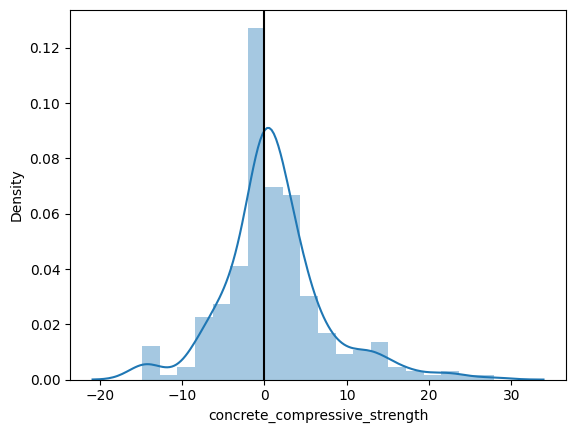

In [65]:
sns.distplot(y_test -y_pred_DT,bins=20)

plt.axvline(0,color='k')

In [55]:
from sklearn.ensemble import RandomForestRegressor

RF=RandomForestRegressor()

RF.fit(X_train,y_train)

y_pred_RF=RF.predict(X_test)



r2_score_RF= r2_score(y_test,y_pred_RF)

print(f'Random Forest Regression R2 Score: {r2_score_RF*100}%')

Random Forest Regression R2 Score: 90.27184882496937%


In [58]:
# Boosting Algorithms
import xgboost as xgb

XGB=xgb.XGBRegressor()

XGB.fit(X_train,y_train)

y_pred_XGB=XGB.predict(X_test)

r2_score_XGB=r2_score(y_test,y_pred_XGB)

print(f'XGBoost Regression R2 Score: {r2_score_XGB*100}%')





XGBoost Regression R2 Score: 92.0547581740837%


In [67]:
from sklearn.ensemble import AdaBoostRegressor

AB=AdaBoostRegressor()

AB.fit(X_train,y_train)

y_pred_AB=AB.predict(X_test)

r2_score_AB=r2_score(y_test,y_pred_AB)

print(f'AdaBoost Regression R2 Score: {r2_score_AB*100}%')

AdaBoost Regression R2 Score: 78.8142474262742%
